In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bluebook-for-bulldozers/Valid.7z
/kaggle/input/bluebook-for-bulldozers/Valid.zip
/kaggle/input/bluebook-for-bulldozers/Train.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv
/kaggle/input/bluebook-for-bulldozers/median_benchmark.csv
/kaggle/input/bluebook-for-bulldozers/Valid.csv
/kaggle/input/bluebook-for-bulldozers/Machine_Appendix.csv
/kaggle/input/bluebook-for-bulldozers/random_forest_benchmark_test.csv
/kaggle/input/bluebook-for-bulldozers/Data Dictionary.xlsx
/kaggle/input/bluebook-for-bulldozers/ValidSolution.csv
/kaggle/input/bluebook-for-bulldozers/Test.csv
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.7z
/kaggle/input/bluebook-for-bulldozers/Train.7z


In [2]:
import seaborn as sns

In [3]:
import zipfile
with zipfile.ZipFile('../input/bluebook-for-bulldozers/Train.zip',"r") as z:
    z.extractall()

In [4]:
df = pd.read_csv('../input/bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False,parse_dates=['saledate'])

In [5]:
df.loc[::-1]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
412697,6333349,13000.0,1944743,21436,149,2.0,2006,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [6]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [7]:
df['UsageBand'] = pd.Categorical(df['UsageBand'],categories=["Low","Medium","High"],ordered=True)

In [8]:
df['UsageBand'] =df['UsageBand'].astype('category').cat.codes

In [9]:
pd.set_option('max_columns',None)

In [10]:
df = df.sort_values('saledate')

In [11]:
df.isna().sum().sort_values(ascending=False)/len(df)

Enclosure_Type              0.937041
Engine_Horsepower           0.937041
Blade_Width                 0.937041
Blade_Extension             0.937041
Pushblock                   0.937041
Tip_Control                 0.937041
Scarifier                   0.937014
Grouser_Tracks              0.891264
Hydraulics_Flow             0.891264
Coupler_System              0.891024
fiModelSeries               0.857845
Steering_Controls           0.826697
Differential_Type           0.826595
fiModelDescriptor           0.818715
Backhoe_Mounting            0.804428
Stick                       0.803498
Turbocharged                0.803498
Pad_Type                    0.803498
Blade_Type                  0.801610
Travel_Controls             0.801606
Tire_Size                   0.763415
Track_Type                  0.752378
Grouser_Type                0.752378
Pattern_Changer             0.752213
Stick_Length                0.752213
Thumb                       0.752041
Undercarriage_Pad_Width     0.750626
R

In [12]:
df.select_dtypes(np.number).isna()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand
205615,False,False,False,False,False,False,False,True,False
274835,False,False,False,False,False,False,False,True,False
141296,False,False,False,False,False,False,False,True,False
212552,False,False,False,False,False,False,False,True,False
62755,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
410879,False,False,False,False,False,False,False,True,False
412476,False,False,False,False,False,False,False,True,False
411927,False,False,False,False,False,False,False,True,False
407124,False,False,False,False,False,False,False,True,False


In [13]:
df['MachineHoursCurrentMeter'].median()

0.0

In [14]:
df.loc[df['auctioneerID'].isna(),'auctioneerID']

340946   NaN
327120   NaN
349532   NaN
330190   NaN
312538   NaN
          ..
336531   NaN
392260   NaN
349193   NaN
351513   NaN
351504   NaN
Name: auctioneerID, Length: 20136, dtype: float64

In [15]:
def preprocessing(df):
    df = df.copy()
    df.sort_values('saledate', inplace=True)
    df['sale_year']= df['saledate'].dt.year
    df['sale_month']= df['saledate'].dt.month
    df['sale_day_of_week']= df['saledate'].dt.dayofweek
    df['IMPUTED_auctioneerID']=df['auctioneerID'].isna()
    df['IMPUTED_MachineHoursCurrentMeter']=df['MachineHoursCurrentMeter'].isna()
    df['auctioneerID'].fillna(df['auctioneerID'].median(),inplace=True)
    df['MachineHoursCurrentMeter'].fillna(df['MachineHoursCurrentMeter'].median(),inplace=True)
    df.drop(['saledate','SalesID'],axis=1,inplace=True)
    for col in df.select_dtypes('object').columns:
        df['IMPUTED_'+col]= df[col].isna()
        df[col] = df[col].astype('category').cat.codes
   # X = df.drop('SalePrice',axis=1)
   # y = df['SalePrice']
    return df
data = preprocessing(df)

In [16]:
data['UsageBand'].unique()

array([-1,  1,  0,  2], dtype=int8)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
model = RandomForestRegressor(max_samples=20000,
                              n_jobs=-1,
                             random_state=43)

In [19]:
test = data[data['sale_year'] == 2012]
train = data[data['sale_year'] != 2012]

In [20]:
X_test = test.drop('SalePrice',axis=1)
y_test = test['SalePrice']
X_train = train.drop('SalePrice',axis=1)
y_train = train['SalePrice']

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 397022
Data columns (total 98 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   MachineID                         401125 non-null  int64  
 1   ModelID                           401125 non-null  int64  
 2   datasource                        401125 non-null  int64  
 3   auctioneerID                      401125 non-null  float64
 4   YearMade                          401125 non-null  int64  
 5   MachineHoursCurrentMeter          401125 non-null  float64
 6   UsageBand                         401125 non-null  int8   
 7   fiModelDesc                       401125 non-null  int16  
 8   fiBaseModel                       401125 non-null  int16  
 9   fiSecondaryDesc                   401125 non-null  int16  
 10  fiModelSeries                     401125 non-null  int8   
 11  fiModelDescriptor                 401125 non-nu

In [22]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.metrics import mean_squared_log_error

In [24]:
%%time
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

CPU times: user 1min 10s, sys: 889 ms, total: 1min 11s
Wall time: 22.7 s


0.27232546327808504

In [25]:
X_train.columns

Index(['MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade',
       'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc', 'fiBaseModel',
       'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls',
       'sale_year', 'sale_month', 'sale_day_of_week', 'IMPUTED_auctioneerID',
       'IMPUTED_MachineHoursCurrentMeter',

In [26]:
features_importance_df = pd.DataFrame()

In [27]:
features_importance_df['Feature'] = X_train.columns

In [28]:
features_importance_df['Value'] = model.feature_importances_

In [29]:
features_importance_df.sort_values('Value',ascending=True)[:10]

,Feature,Value
61,IMPUTED_fiProductClassDesc,0.000000e+00
64,IMPUTED_ProductGroupDesc,0.000000e+00
55,IMPUTED_fiModelDesc,0.000000e+00
56,IMPUTED_fiBaseModel,0.000000e+00
63,IMPUTED_ProductGroup,0.000000e+00
62,IMPUTED_state,0.000000e+00
85,IMPUTED_Grouser_Tracks,1.740903e-07
72,IMPUTED_Turbocharged,4.611753e-06
66,IMPUTED_Enclosure,5.969191e-06
38,Hydraulics_Flow,6.287411e-06


<AxesSubplot:xlabel='Value', ylabel='Feature'>

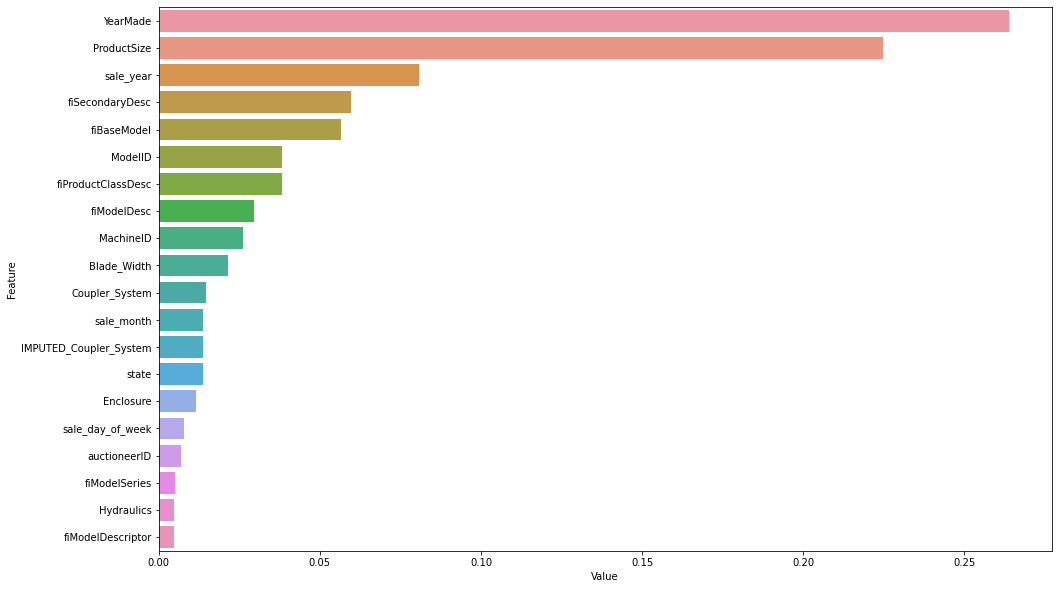

In [30]:
plt.figure(figsize=(16,10))
sns.barplot(data=features_importance_df.sort_values('Value',ascending=False)[:20],x='Value',y='Feature')

In [31]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<AxesSubplot:xlabel='Value', ylabel='Feature'>

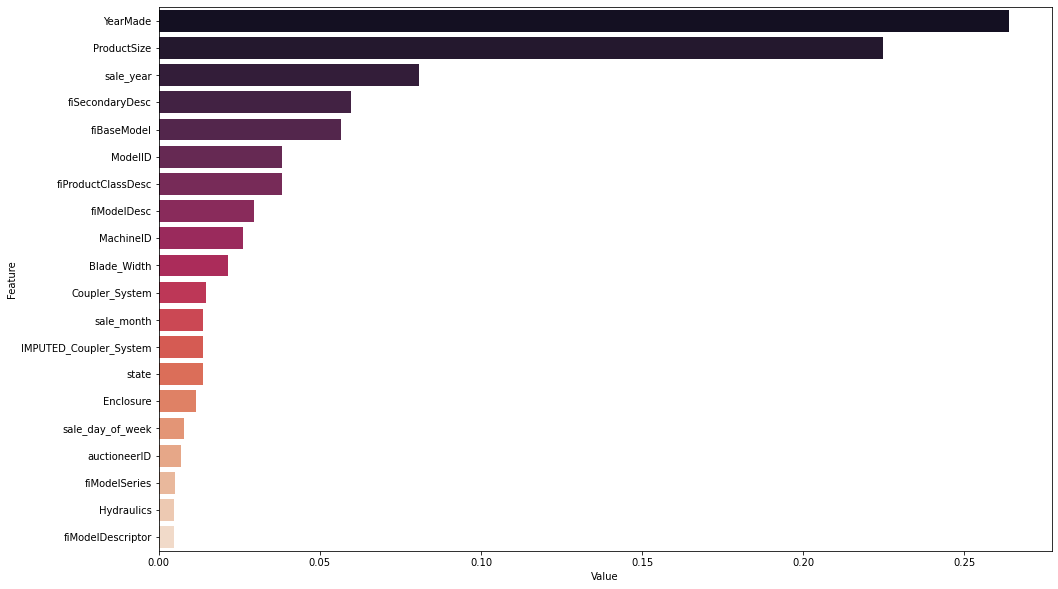

In [32]:
f, ax = plt.subplots(figsize=(16, 10))
sns.barplot(data=features_importance_df.sort_values('Value',ascending=False)[:20],
            x='Value',
            y='Feature',
            ax=ax,
            palette='rocket')